In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, roc_curve, recall_score, precision_score
print(tf.__version__)

2.13.0


# data preprocessing and split

In [91]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data = data.dropna()
data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
1,0.0,1000,-30,30,283,0.988,292.1,1.019,671.9,33.27,67.2,3.69,4.31,6.55,7.48,364,4.06,245.1,469.0,1.0
2,1.0,1000,-30,30,293,0.988,297.4,1.019,671.1,33.15,66.9,3.73,4.29,6.52,7.42,365.9,3.94,250.8,477.0,1.0
3,2.0,1000,-30,30,303,0.988,302.6,1.019,670.9,33.03,66.6,3.76,4.26,6.48,7.38,367.1,3.89,253.8,485.0,1.0
4,3.0,1000,-30,35,283,0.991,292.3,1.02,673.2,33.57,67.8,3.3,4.42,6.59,7.51,365.4,4.2,246.9,454.0,1.0
5,4.0,1000,-30,35,293,0.991,297.4,1.02,672.2,33.44,67.5,3.34,4.39,6.55,7.46,367.5,4.05,253.2,461.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [92]:
len_0 = len(data.loc[data['Knocking'] == 0])
len_1 = len(data.loc[data['Knocking'] == 1])
print(len_0)
print(len_1)

1064
1081


In [93]:
X_data = data.loc[:, ['Engine Speed', 'Spark Timing', 'Throttle Angle', 'Ambient Temperature', 
                                   'Intake Pressure', 'Intake Temperature','Exhaust Pressure', 'Exhaust Temperature', 'Injected Mass']]
y_data = data['Knocking']
print(X_data)
print(y_data)

     Engine Speed Spark Timing Throttle Angle Ambient Temperature   
1            1000          -30             30                 283  \
2            1000          -30             30                 293   
3            1000          -30             30                 303   
4            1000          -30             35                 283   
5            1000          -30             35                 293   
...           ...          ...            ...                 ...   
2141         6000          -10             85                 293   
2142         6000          -10             85                 303   
2143         6000          -10             90                 283   
2144         6000          -10             90                 293   
2145         6000          -10             90                 303   

     Intake Pressure Intake Temperature Exhaust Pressure Exhaust Temperature   
1              0.988              292.1            1.019               671.9  \
2          

In [94]:
train_input, test_input, train_output, test_output = train_test_split(X_data, y_data,test_size=0.2, shuffle=True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.25, shuffle=True, random_state=42) # train, validation, test 비율 조정, 함수 만들어 보기
print(train_input.shape)
print(train_output.shape)
print(val_input.shape)
print(val_output.shape)
print(test_input.shape)
print(test_output.shape)


(1287, 9)
(1287,)
(429, 9)
(429,)
(429, 9)
(429,)


In [95]:

ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale = ss.transform(val_input)
test_scale = ss.transform(test_input)
print(train_scale)
print(val_scale)
print(test_scale)

[[ 0.94116682 -1.42752381 -0.27742293 ...  0.8590414   0.36974684
   0.96453667]
 [ 1.57418573 -1.42752381 -0.80834236 ...  1.1903374   0.59817701
   0.32597037]
 [ 0.3081479  -0.01318729  0.78441592 ...  0.3068814   0.39817806
   0.87128571]
 ...
 [ 1.57418573  1.40114924 -1.07380208 ...  1.58053047  2.0579733
   0.10500616]
 [-1.27439938 -0.72035555  0.78441592 ... -1.15082099 -1.44789072
  -1.15185449]
 [-0.95788993 -0.72035555  0.78441592 ... -1.01094046 -0.7988745
  -0.74438837]]
[[-1.27439938  1.40114924 -1.33926179 ... -1.12873459 -0.8371096
  -1.51269512]
 [-1.59090884  1.40114924  0.51895621 ... -1.32015006 -1.63710542
  -1.84515504]
 [-0.95788993 -1.42752381 -1.33926179 ... -1.03302686 -0.93024637
  -0.91264552]
 ...
 [-0.95788993 -1.42752381 -0.27742293 ... -1.02566473 -0.88122701
  -0.80520421]
 [ 1.57418573 -0.72035555 -1.33926179 ...  0.94002487  0.77562707
  -0.35719421]
 [-0.32487101 -0.72035555 -0.27742293 ... -0.488229   -0.31848486
   0.2408282 ]]
[[ 0.3081479   1.40

# DNN Model 

In [96]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape = (9,)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_467"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1825 (Dense)          (None, 100)               1000      
                                                                 
 dropout_1358 (Dropout)      (None, 100)               0         
                                                                 
 dense_1826 (Dense)          (None, 10)                1010      
                                                                 
 dropout_1359 (Dropout)      (None, 10)                0         
                                                                 
 dense_1827 (Dense)          (None, 1)                 11        
                                                                 
Total params: 2021 (7.89 KB)
Trainable params: 2021 (7.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [99]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-classification-model.h5')
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_scale, train_output, epochs=1000, batch_size = 64, validation_data=(val_scale, val_output), callbacks=[callback, checkpoint_cb])


Epoch 1/1000


2024-03-14 11:08:59.045256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - ETA: 0s - loss: 0.4714 - accuracy: 0.7669

2024-03-14 11:09:13.118336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

In [ ]:
model.save('best-classification-model.h5')
model = keras.models.load_model('best-classification-model.h5')

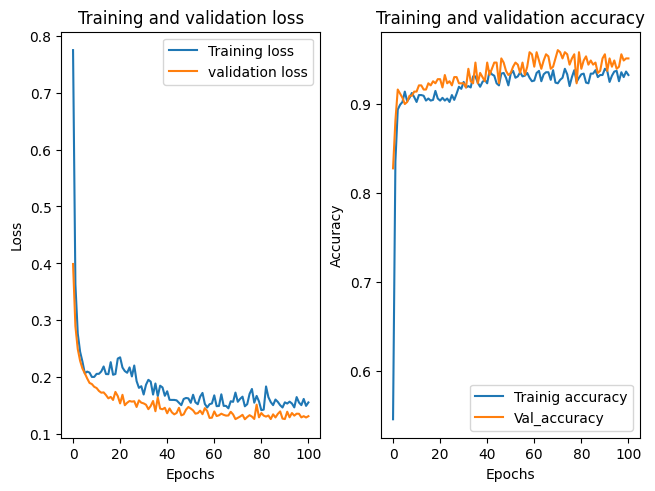

In [ ]:
history_dic = history.history
loss = history_dic['loss']
val_loss = history_dic['val_loss']
accuracy = history_dic['accuracy']
val_accuracy = history_dic['val_accuracy']
fig, axs= plt.subplots(1, 2, constrained_layout = True)
axs[0].plot(loss, label = 'Training loss')
axs[0].plot(val_loss, label = 'validation loss')
axs[1].plot(accuracy, label = 'Trainig accuracy')
axs[1].plot(val_accuracy, label = 'Val_accuracy')
axs[0].set_title('Training and validation loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[1].set_title('Training and validation accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[0].legend()
axs[1].legend()
plt.show()
# loss값 파일 저장 및 출력 필요


In [ ]:
loss_accuracy_df = pd.DataFrame(((loss[i], val_loss[i], accuracy[i], val_accuracy[i]) for i in range(len(history.epoch))), columns=['Loss', 'Val_Loss', 'Accuracy', 'Val_Accuracy'])
loss_accuracy_df

,Loss,Val_Loss,Accuracy,Val_Accuracy
0,0.775013,0.398852,0.545455,0.827506
1,0.363217,0.289382,0.835276,0.881119
2,0.276565,0.249316,0.893551,0.916084
3,0.244416,0.228579,0.898990,0.911422
4,0.227080,0.214987,0.902098,0.906760
...,...,...,...,...
96,0.155169,0.135401,0.925408,0.941725
97,0.150633,0.129080,0.935509,0.955711
98,0.161535,0.131203,0.930070,0.948718
99,0.149310,0.128896,0.936286,0.951049


In [ ]:
loss_accuracy_df.to_csv('loss_and_accuracy.csv', index=True)

In [ ]:
loss_and_accuracy_test = model.evaluate(test_scale, test_output)
loss_and_accuracy_train = model.evaluate(train_scale, train_output)
loss_and_accuracy_val = model.evaluate(val_scale, val_output)
print(loss_and_accuracy_test)
print(loss_and_accuracy_train)
print(loss_and_accuracy_val)
print('loss = ', loss_and_accuracy_test[0])
print('loss = ', loss_and_accuracy_train[0])
print('loss = ', loss_and_accuracy_val[0])
print('accuracy = ', loss_and_accuracy_train[1])
print('accuracy = ', loss_and_accuracy_val[1])
print('accuracy = ', loss_and_accuracy_test[1])

 9/14 [==================>...........] - ETA: 0s - loss: 0.1087 - accuracy: 0.9479

2024-03-13 19:14:16.734655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 6ms/step - loss: 0.1367 - accuracy: 0.9394
[0.14877155423164368, 0.9370629191398621]
[0.11735039204359055, 0.943278968334198]
[0.13669298589229584, 0.939393937587738]
loss =  0.14877155423164368
loss =  0.11735039204359055
loss =  0.13669298589229584
accuracy =  0.943278968334198
accuracy =  0.939393937587738
accuracy =  0.9370629191398621


In [ ]:
predicted_test = model.predict(test_scale)
predicted_train = model.predict(train_scale)
predicted_val = model.predict(val_scale)


41/41 [==============================] - 0s 2ms/step


2024-03-13 19:14:17.517709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 2ms/step


0.9388
0.943
0.9435


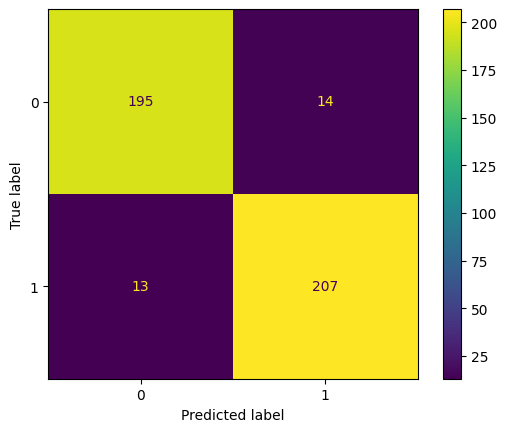

In [ ]:
#Confusion matrix
predicted_test = np.array([1 if x >= 0.5 else 0 for x in predicted_test])
predicted_train = np.array([1 if x >= 0.5 else 0 for x in predicted_train])
predicted_val = np.array([1 if x >= 0.5 else 0 for x in predicted_val])

actual_test = np.array(test_output)
actual_train = np.array(train_output)
actual_val = np.array(val_output)

conf_matrix = confusion_matrix(actual_test, predicted_test)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()

#f1-score
print(round(f1_score(actual_test, predicted_test), 4))
print(round(f1_score(actual_train, predicted_train), 4))
print(round(f1_score(actual_val, predicted_val), 4))

In [ ]:
print(predicted_test)
print(predicted_train)
print(predicted_val)

[0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0
 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0
 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1
 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0
 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1
 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0]
[1 1 0 ... 0 1 1]
[0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1
 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0

In [ ]:
test_df = pd.DataFrame(((predicted_test[i]) for i in range(len(test_output))), columns=['Predicted_test'], index = test_output.index)
test_df['Raw_test'] = (test_output)
test_df

,Predicted_test,Raw_test
1345,0,0.0
1935,0,0.0
129,1,1.0
333,1,1.0
1164,0,0.0
...,...,...
545,1,1.0
1201,1,1.0
509,0,1.0
1333,0,0.0


In [ ]:
train_df = pd.DataFrame(((predicted_train[i]) for i in range(len(train_output))), columns=['Predicted_train'], index = train_output.index)
train_df['Raw_train'] = (train_output)
train_df

,Predicted_train,Raw_train
1578,1,1.0
1962,1,0.0
1278,0,0.0
58,1,1.0
94,1,1.0
...,...,...
2109,0,0.0
471,1,1.0
2113,0,0.0
263,1,1.0


In [ ]:
validation_df = pd.DataFrame(((predicted_val[i]) for i in range(len(val_output))), columns=['Predicted_val'], index = val_output.index)
validation_df['Raw_validation'] = (val_output)
validation_df

,Predicted_val,Raw_validation
356,0,1.0
181,1,1.0
395,1,1.0
1487,0,0.0
168,1,1.0
...,...,...
524,1,1.0
1137,0,0.0
407,1,1.0
1993,0,0.0


In [ ]:
test_df.to_csv('Test_df.csv', index=True)
train_df.to_csv('Train_df.csv', index=True)
validation_df.to_csv('Validation_df.csv', index=True)

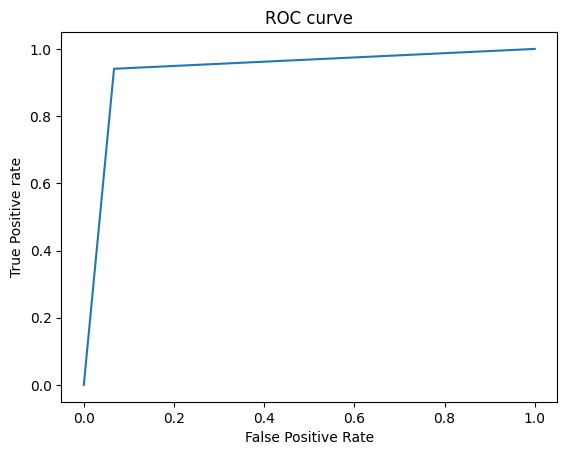

0.9369617224880382


In [ ]:
#ROC CURVE
fpr, tpr, thresh = roc_curve(actual_test, predicted_test, pos_label=1)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()
    
#AUC    
auc_score1 = roc_auc_score(actual_test, predicted_test)
print(auc_score1)

In [ ]:
print(round(recall_score(test_output, predicted_test), 4))
print(round(recall_score(train_output, predicted_train), 4))
print(round(recall_score(val_output, predicted_val), 4))

0.9409
0.9557
0.9476


In [ ]:
print(round(precision_score(test_output, predicted_test), 4))
print(round(precision_score(train_output, predicted_train), 4))
print(round(precision_score(val_output, predicted_val), 4))

0.9367
0.9307
0.9394


In [ ]:
data = [[round(loss_and_accuracy_test[0], 4), round(loss_and_accuracy_train[1], 4), round(recall_score(test_output, predicted_test), 4), round(precision_score(test_output, predicted_test), 4), round(f1_score(actual_test, predicted_test), 4)],
        [round(loss_and_accuracy_train[0], 4), round(loss_and_accuracy_train[1], 4),round(recall_score(train_output, predicted_train), 4), round(precision_score(train_output, predicted_train), 4), round(f1_score(actual_train, predicted_train), 4)],
        [round(loss_and_accuracy_val[0], 4), round(loss_and_accuracy_val[1], 4),round(recall_score(val_output, predicted_val), 4), round(precision_score(val_output, predicted_val), 4), round(f1_score(actual_val, predicted_val), 4)]]
index = ['Loss', 'Accuracy', 'Recall', 'Precision', 'F1_score']
print(data)


[[0.1488, 0.9433, 0.9409, 0.9367, 0.9388], [0.1174, 0.9433, 0.9557, 0.9307, 0.943], [0.1367, 0.9394, 0.9476, 0.9394, 0.9435]]


In [ ]:
metrics_df = pd.DataFrame(data, columns = index, index= ['Test', 'Train', 'Validation'])
metrics_df.to_csv('Binary_Classification_Metrics.csv')
metrics_df

,Loss,Accuracy,Recall,Precision,F1_score
Test,0.1488,0.9433,0.9409,0.9367,0.9388
Train,0.1174,0.9433,0.9557,0.9307,0.9430
Validation,0.1367,0.9394,0.9476,0.9394,0.9435


In [ ]:
'''
import random
from itertools import product

params_list = []
hidden_layer_list = [1, 2, 3, 4]
hidden_units_list = [200, 100, 50, 10]
dropout_rate_list = [0.1, 0.2, 0.3, 0.4]
learning_rate_list = [0.1, 0.001, 0.0001]
batch_size_list = [64, 32, 16, 8]


a_list = []
b_list = []

for i in hidden_layer_list:
    a = list(product(hidden_units_list, repeat = i))
    b = list(product(dropout_rate_list, repeat = i))
    a_list.append(a)
    b_list.append(b)
print(a_list)
print(b_list)

best_accuracy = 0

model = keras.Sequential()

for i in hidden_units_list:
    for j in dropout_rate_list:
        for _ in hidden_layer_list:
            model.add(keras.layers.Dense(hidden_units_list[i], activation='relu', input_shape = (9, )))
            model.add(keras.layers.Dropout(dropout_rate_list[j]))
            model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam())
'''


"\nimport random\nfrom itertools import product\n\nparams_list = []\nhidden_layer_list = [1, 2, 3, 4]\nhidden_units_list = [200, 100, 50, 10]\ndropout_rate_list = [0.1, 0.2, 0.3, 0.4]\nlearning_rate_list = [0.1, 0.001, 0.0001]\nbatch_size_list = [64, 32, 16, 8]\n\n\na_list = []\nb_list = []\n\nfor i in hidden_layer_list:\n    a = list(product(hidden_units_list, repeat = i))\n    b = list(product(dropout_rate_list, repeat = i))\n    a_list.append(a)\n    b_list.append(b)\nprint(a_list)\nprint(b_list)\n\nbest_accuracy = 0\n\nmodel = keras.Sequential()\n\nfor i in hidden_units_list:\n    for j in dropout_rate_list:\n        for _ in hidden_layer_list:\n            model.add(keras.layers.Dense(hidden_units_list[i], activation='relu', input_shape = (9, )))\n            model.add(keras.layers.Dropout(dropout_rate_list[j]))\n            model.add(keras.layers.Dense(1, activation='sigmoid'))\n    model.compile(optimizer=tf.keras.optimizers.legacy.Adam())\n"

# Hyperparameters Tuning

In [ ]:
from sklearn.model_selection import ParameterGrid

# 하이퍼파라미터 그리드 정의
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.1, 0.2, 0.3],
    'hidden_layers': [1, 2, 3],
    'hidden_units': [50, 100, 200],
    'batch_size' : [64, 32, 16]
}

# 하이퍼파라미터 그리드를 순회하며 그리드 서치 실행
best_accuracy = 0
best_params = {}
params_df = pd.DataFrame(index = ['Learning_rate' ,'Dropout_rate', 'Hidden_layers', 'Hidden_units', 'batch_size', 'Accuracy', 'Loss'])

i = 0
for params in ParameterGrid(param_grid):
    print("Training with parameters:", params)
    
    # 모델 생성
    model = keras.Sequential()
    model.add(keras.layers.Dense(params['hidden_units'], activation='relu', input_shape=(9,)))
    model.add(keras.layers.Dropout(params['dropout_rate']))
    
    for _ in range(params['hidden_layers']):
        model.add(keras.layers.Dense(params['hidden_units'], activation='relu'))
        model.add(keras.layers.Dropout(params['dropout_rate']))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    # 모델 컴파일
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # 모델 훈련
    history = model.fit(train_scale, train_output, epochs=1000, batch_size=params['batch_size'], 
                        validation_data=(val_scale, val_output), 
                        callbacks=[callback, checkpoint_cb],
                        verbose=0)
    
    # 검증 세트에 대한 정확도 계산
    val_accuracy_and_loss = model.evaluate(val_scale, val_output, verbose=0)
    print("Validation loss :", val_accuracy_and_loss[0])
    print("Validation accuracy : ", val_accuracy_and_loss[1])

    data_params = [params['learning_rate'], params['dropout_rate'], params['hidden_layers'], params['hidden_units'], params['batch_size'], val_accuracy_and_loss[0], val_accuracy_and_loss[1]]
    params_df.concat(data_params, axis = 0)
    #i += 1
    # 최적의 하이퍼파라미터와 정확도 업데이트
    if val_accuracy_and_loss[0] > best_accuracy:
        best_accuracy = val_accuracy_and_loss[0]
        best_params = params
    model.save_weights('best-hyperparameters.h5')
    
print("Best parameters:", best_params)
print("Best validation accuracy:", best_accuracy)



Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 08:52:52.280214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:53:00.852251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.16364900767803192
Validation loss :  0.9230769276618958
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 08:53:19.343701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:53:27.216972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.19881899654865265
Validation loss :  0.9067599177360535
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 08:53:41.747652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:53:49.842543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 2.0078604221343994
Validation loss :  0.8041958212852478
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 08:54:03.655781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:54:10.851980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.1608269363641739
Validation loss :  0.9160839319229126
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 08:54:27.810552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:54:35.756930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.39824214577674866
Validation loss :  0.8717948794364929
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 08:54:50.450459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:54:58.870939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 3.1713452339172363
Validation loss :  0.8717948794364929
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 08:55:13.266661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:55:21.687591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.16401058435440063
Validation loss :  0.9207459092140198
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 08:55:37.313713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:55:44.847038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.5037417411804199
Validation loss :  0.8461538553237915
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 08:55:59.653766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:56:07.402135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 45.66289520263672
Validation loss :  0.6410256624221802
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 08:56:21.912958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:56:31.088165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.19450607895851135
Validation loss :  0.9137529134750366
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 08:56:49.013308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:56:57.862354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.18480412662029266
Validation loss :  0.9184148907661438
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 08:57:13.211345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:57:22.288817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 47.748329162597656
Validation loss :  0.7855477929115295
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 08:57:39.067495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:57:48.347859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.1973753571510315
Validation loss :  0.9090909361839294
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 08:58:05.774085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:58:15.150980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.42451202869415283
Validation loss :  0.8624708652496338
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 08:58:31.588765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:58:40.025856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 58.62900924682617
Validation loss :  0.8018648028373718
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 08:58:55.842743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:59:05.662960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.14327800273895264
Validation loss :  0.9370629191398621
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 08:59:22.303427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:59:31.086121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.2277618944644928
Validation loss :  0.8857808709144592
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 08:59:47.241527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 08:59:56.618184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 383.925048828125
Validation loss :  0.8508158326148987
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 09:00:14.088311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:00:24.896187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.17561796307563782
Validation loss :  0.9114218950271606
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 09:00:43.112778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:01:00.486922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.6769638061523438
Validation loss :  0.8228438496589661
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 09:01:18.673752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:01:28.775817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 207.6118927001953
Validation loss :  0.8321678042411804
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 09:01:46.671244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:01:57.174976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.1779364049434662
Validation loss :  0.9090909361839294
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 09:02:14.346839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:02:24.618277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 1.8617217540740967
Validation loss :  0.7575757503509521
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 09:02:43.088255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:02:54.754132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 2686.781982421875
Validation loss :  0.5827505588531494
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 09:03:12.493772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:03:22.287542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.4359857141971588
Validation loss :  0.8438228368759155
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 09:03:42.149124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:03:52.400249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 1.3962408304214478
Validation loss :  0.748251736164093
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 09:04:11.422477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:04:21.135793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 12592.3037109375
Validation loss :  0.8391608595848083
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 09:04:38.917047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:04:46.570341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.14445911347866058
Validation loss :  0.9440559148788452
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 09:05:06.422592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:05:14.107835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.1730041652917862
Validation loss :  0.9137529134750366
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 09:05:29.299026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:05:36.869221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.3793097138404846
Validation loss :  0.8997669219970703
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 09:05:51.895151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:06:00.033083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.16784648597240448
Validation loss :  0.9160839319229126
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 09:06:15.950213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:06:23.700007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.17338836193084717
Validation loss :  0.9184148907661438
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 09:06:38.957954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:06:46.668496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 5.743426322937012
Validation loss :  0.8717948794364929
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 09:07:01.279255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:07:09.031037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.15436893701553345
Validation loss :  0.9277389049530029
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 09:07:25.770159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:07:33.921690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.6199980974197388
Validation loss :  0.8205128312110901
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 09:07:48.793974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:07:56.853816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 7.633683204650879
Validation loss :  0.8787878751754761
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 09:08:12.952037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:08:21.924658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.18344013392925262
Validation loss :  0.9114218950271606
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 09:08:40.293450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:08:49.428138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.290185809135437
Validation loss :  0.881118893623352
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 09:09:06.082591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:09:15.457084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 2.5961692333221436
Validation loss :  0.8508158326148987
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 09:09:31.008632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:09:40.006916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.2162543684244156
Validation loss :  0.9044288992881775
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 09:09:57.856915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:10:07.921055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.40960344672203064
Validation loss :  0.8881118893623352
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 09:10:23.554800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:10:32.089307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 67.701416015625
Validation loss :  0.9137529134750366
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 09:10:50.526310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:11:00.286526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.15635927021503448
Validation loss :  0.9277389049530029
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 09:11:16.940578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:11:26.274875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.9359356164932251
Validation loss :  0.8344988226890564
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 09:11:42.572818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:11:52.785728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 454.1510925292969
Validation loss :  0.8461538553237915
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 09:12:10.161076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:12:21.219112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.15207049250602722
Validation loss :  0.9324009418487549
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 09:12:41.143786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:12:52.582140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.20350411534309387
Validation loss :  0.9044288992881775
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 09:13:09.815676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:13:21.619151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 163.3054656982422
Validation loss :  0.7319347262382507
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 09:13:40.381964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:13:51.489010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.16699983179569244
Validation loss :  0.9137529134750366
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 09:14:11.453180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:14:22.147871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 6.956211566925049
Validation loss :  0.6013985872268677
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 09:14:46.222906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:14:58.147676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 578.2900390625
Validation loss :  0.8484848737716675
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 09:15:16.796578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:15:27.530012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.15957209467887878
Validation loss :  0.9184148907661438
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 09:15:46.882810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:15:57.613474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.39086657762527466
Validation loss :  0.8951048851013184
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 09:16:15.569428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:16:26.326113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 45146.3515625
Validation loss :  0.8275058269500732
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 09:16:43.895312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:16:52.019004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.18129600584506989
Validation loss :  0.9184148907661438
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 09:17:21.798548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:17:30.494410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.23796917498111725
Validation loss :  0.8997669219970703
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 09:17:45.613509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:17:54.049967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.6482945084571838
Validation loss :  0.8741258978843689
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 09:18:10.447046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:18:18.940018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.17519785463809967
Validation loss :  0.9090909361839294
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 09:18:35.626889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:18:44.154756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.1621619313955307
Validation loss :  0.9277389049530029
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 09:18:59.590249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:19:07.848097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 6.947333812713623
Validation loss :  0.8368298411369324
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 09:19:22.930616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:19:31.262277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.2037678211927414
Validation loss :  0.9090909361839294
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 09:19:52.048222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:20:00.079502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.2580377161502838
Validation loss :  0.9067599177360535
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 09:20:17.518613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:20:26.043471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 14.647400856018066
Validation loss :  0.8205128312110901
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 09:20:41.523130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:20:50.631932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.20771238207817078
Validation loss :  0.9137529134750366
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 09:21:11.678225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:21:24.562769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.1822994351387024
Validation loss :  0.9067599177360535
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 09:21:42.159204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:21:51.711897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 4.558323860168457
Validation loss :  0.7855477929115295
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 09:22:08.599117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:22:18.261301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.198317289352417
Validation loss :  0.9160839319229126
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 09:22:37.080071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:22:47.453734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.453527569770813
Validation loss :  0.8484848737716675
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 09:23:04.339778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:23:14.397682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 469.3588562011719
Validation loss :  0.7832167744636536
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 09:23:31.398174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:23:41.454191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.16172480583190918
Validation loss :  0.9184148907661438
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 09:24:00.184187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:24:10.068934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.2757829427719116
Validation loss :  0.9114218950271606
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 09:24:26.573096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:24:36.236807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 1132.858154296875
Validation loss :  0.8344988226890564
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 09:24:53.018879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:25:03.729787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.195583313703537
Validation loss :  0.9160839319229126
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 09:25:23.997902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:25:35.612703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.2171706110239029
Validation loss :  0.9137529134750366
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 09:25:53.490545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:26:04.433298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 66.48165130615234
Validation loss :  0.8648018836975098
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 09:26:23.309233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:26:35.097195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.1630236804485321
Validation loss :  0.9230769276618958
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 09:26:55.603766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:27:07.284883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.5586647987365723
Validation loss :  0.8741258978843689
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 09:27:26.161371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:27:38.221820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 575.3212280273438
Validation loss :  0.8321678042411804
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 09:27:56.274349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:28:08.551970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.16444912552833557
Validation loss :  0.9254079461097717
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 09:28:27.429908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:28:39.080894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.2817440330982208
Validation loss :  0.9184148907661438
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 09:29:04.173269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:29:17.677088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 15127.0400390625
Validation loss :  0.8508158326148987
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 09:29:38.369121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:29:46.824874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.16357114911079407
Validation loss :  0.9207459092140198
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 09:30:11.360452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:30:20.358734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.19070746004581451
Validation loss :  0.9067599177360535
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 09:30:39.644426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:30:48.655221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 3.4915859699249268
Validation loss :  0.9044288992881775
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 09:31:08.395793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:31:17.617504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.187715545296669
Validation loss :  0.9184148907661438
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 09:31:39.264737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:31:48.984887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.2969213128089905
Validation loss :  0.8857808709144592
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 09:32:06.846830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:32:16.099628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 19.049652099609375
Validation loss :  0.8181818127632141
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 09:32:35.392743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:32:45.822812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.21216309070587158
Validation loss :  0.9044288992881775
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 09:33:07.789703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:33:17.246181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.2830202579498291
Validation loss :  0.8927738666534424
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 09:33:36.996128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:33:46.339767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 45.90342330932617
Validation loss :  0.8601398468017578
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 09:34:04.917493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:34:15.217089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.1979515254497528
Validation loss :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 09:34:38.706905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:34:49.742327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.17588159441947937
Validation loss :  0.9090909361839294
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 09:35:10.360935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:35:20.976371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 10.752690315246582
Validation loss :  0.8764568567276001
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 09:35:40.909230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:35:51.624698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.18678872287273407
Validation loss :  0.9230769276618958
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 09:36:12.885662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:36:23.934850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.8408416509628296
Validation loss :  0.8764568567276001
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 09:36:45.226868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:36:55.776288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 1954.2174072265625
Validation loss :  0.7808857560157776
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 09:37:17.380518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:37:28.331618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.15462033450603485
Validation loss :  0.9207459092140198
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 09:37:49.669255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:38:00.909436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.6206843852996826
Validation loss :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 09:38:21.004700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:38:32.351971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 3337.837890625
Validation loss :  0.8438228368759155
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 09:38:54.154504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:39:07.610416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.1830083131790161
Validation loss :  0.9090909361839294
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 09:39:32.197049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:39:44.907786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy : 0.6426587104797363
Validation loss :  0.8578088283538818
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:40:08.945052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:40:21.683005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 139.41612243652344
Validation loss :  0.8438228368759155
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:40:45.804812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:40:58.269270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.17256556451320648
Validation loss :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:41:21.703169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:41:38.970861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 1.283253788948059
Validation loss :  0.8624708652496338
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:42:06.940594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:42:21.292807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 14309.423828125
Validation loss :  0.7995337843894958
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:42:47.835172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:43:01.911011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.20574842393398285
Validation loss :  0.9184148907661438
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:43:29.816802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:43:44.342862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 4.3116984367370605
Validation loss :  0.8881118893623352
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:44:10.962541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:44:27.673597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 117575.703125
Validation loss :  0.8298368453979492
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:44:51.217777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:45:01.481271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.1589662730693817
Validation loss :  0.9230769276618958
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:45:25.321414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:45:35.568070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.2543824315071106
Validation loss :  0.8857808709144592
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:45:55.575315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:46:05.253100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 2.0061817169189453
Validation loss :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:46:25.509318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:46:35.793194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.18340818583965302
Validation loss :  0.9160839319229126
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:47:05.780549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:47:16.747853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.29044637084007263
Validation loss :  0.8624708652496338
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:47:37.046796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:47:47.084542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 8.155484199523926
Validation loss :  0.8438228368759155
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:48:06.263011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:48:17.514317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.157180517911911
Validation loss :  0.9277389049530029
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:48:40.024805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:48:51.148054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.2787773907184601
Validation loss :  0.9207459092140198
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:49:12.282642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:49:22.002918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 66.16184997558594
Validation loss :  0.8438228368759155
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:49:43.043104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:49:55.359077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.18476450443267822
Validation loss :  0.9184148907661438
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:50:21.146920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:50:32.385576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.21809308230876923
Validation loss :  0.9044288992881775
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:50:55.642856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:51:07.514329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 23.433507919311523
Validation loss :  0.8321678042411804
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:51:29.916156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:51:42.056615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.18428336083889008
Validation loss :  0.9184148907661438
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:52:05.132959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:52:16.641811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.19573929905891418
Validation loss :  0.9020978808403015
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:52:39.402095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:52:51.086262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 608.025146484375
Validation loss :  0.8018648028373718
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:53:13.335871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:53:25.337595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.23505212366580963
Validation loss :  0.8951048851013184
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:53:49.033760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:54:02.267710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.405306339263916
Validation loss :  0.9160839319229126
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:54:24.552540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:54:37.360320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 2869.52880859375
Validation loss :  0.8414918184280396
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:54:59.755963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:55:14.146153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.20839515328407288
Validation loss :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:55:39.096027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:55:53.846591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.4598544239997864
Validation loss :  0.8578088283538818
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:56:19.067158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:56:34.023117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 162.05946350097656
Validation loss :  0.8997669219970703
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:56:58.565136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:57:12.353684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.21086062490940094
Validation loss :  0.9020978808403015
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:57:38.415846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:57:53.939661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 42.54111099243164
Validation loss :  0.3589743673801422
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:58:19.908405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:58:34.750968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 24040.63671875
Validation loss :  0.7599067687988281
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:59:01.061745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 09:59:19.151115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.31568068265914917
Validation loss :  0.8717948794364929
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 09:59:44.875494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:00:01.526601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 80.220458984375
Validation loss :  0.6340326070785522
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:00:25.561967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:00:43.790227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 979047.9375
Validation loss :  0.7226107120513916
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:01:13.542256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:01:24.895867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.1660667508840561
Validation loss :  0.9277389049530029
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:01:50.340985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:02:03.032493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.1862671971321106
Validation loss :  0.9137529134750366
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:02:25.697590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:02:39.294596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 2.6808576583862305
Validation loss :  0.9160839319229126
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:03:05.931811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:03:18.007753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.20412041246891022
Validation loss :  0.8997669219970703
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:03:46.274896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:03:58.756087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.2834434509277344
Validation loss :  0.8764568567276001
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:04:20.476979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:04:33.069009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 11.450889587402344
Validation loss :  0.8554778695106506
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:04:53.874477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:05:05.565015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.25131627917289734
Validation loss :  0.8974359035491943
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:05:29.500350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:05:42.291008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.22666986286640167
Validation loss :  0.8951048851013184
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:06:11.599010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:06:24.228850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 29.714813232421875
Validation loss :  0.9020978808403015
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:06:44.507963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:06:59.865033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.1747458577156067
Validation loss :  0.9207459092140198
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:07:25.988741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:07:40.376542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.2108423411846161
Validation loss :  0.9090909361839294
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:08:04.522279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:08:19.352590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 12.81517505645752
Validation loss :  0.8554778695106506
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:08:43.523470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:08:57.626898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.2023799866437912
Validation loss :  0.9044288992881775
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:09:23.254815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:09:38.360134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 1.5705604553222656
Validation loss :  0.7855477929115295
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:10:01.553004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:10:15.566852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 708.5477905273438
Validation loss :  0.806526780128479
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:10:41.000804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:10:56.624027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.24691346287727356
Validation loss :  0.8927738666534424
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:11:22.446292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:11:37.383602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 5.261784553527832
Validation loss :  0.8414918184280396
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:12:04.513643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:12:20.281118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 624.4746704101562
Validation loss :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:12:45.879499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:13:03.131596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.17950734496116638
Validation loss :  0.9254079461097717
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:13:29.398030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:13:46.777258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.8991271257400513
Validation loss :  0.8321678042411804
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:14:12.798611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:14:30.064911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 194.97061157226562
Validation loss :  0.9067599177360535
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:14:56.191180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:15:12.952423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.2156461924314499
Validation loss :  0.9067599177360535
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:15:41.088202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:15:57.770798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.7821502089500427
Validation loss :  0.8857808709144592
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:16:25.199375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:16:42.561985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 6760.5732421875
Validation loss :  0.9090909361839294
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:17:07.811878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:17:24.995784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.22586414217948914
Validation loss :  0.8974359035491943
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:17:53.297787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:18:09.811919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 2.4407224655151367
Validation loss :  0.8787878751754761
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:18:35.569092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:18:53.580128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 266531.1875
Validation loss :  0.7808857560157776
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:19:18.448830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:19:34.723123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.19460313022136688
Validation loss :  0.9044288992881775
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:20:11.262838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:20:25.526549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.2085331678390503
Validation loss :  0.9067599177360535
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:20:58.543386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:21:12.535931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 8.57084846496582
Validation loss :  0.9067599177360535
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:21:46.676218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:22:02.457124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.308939129114151
Validation loss :  0.9044288992881775
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:22:45.318660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:22:58.969946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.25637927651405334
Validation loss :  0.9114218950271606
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:23:33.927469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:23:48.467148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 230.4168701171875
Validation loss :  0.8158507943153381
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:24:22.083671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:24:38.073429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.21755674481391907
Validation loss :  0.9020978808403015
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:25:14.850804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:25:29.540861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 1.7297935485839844
Validation loss :  0.8228438496589661
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:26:03.762407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:26:18.555573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 474.33831787109375
Validation loss :  0.8228438496589661
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:26:52.056645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:27:08.834719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.1953962743282318
Validation loss :  0.9067599177360535
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:27:49.782511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:28:05.982880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.9053083658218384
Validation loss :  0.8764568567276001
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:28:50.054489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:29:08.820250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 463.1239318847656
Validation loss :  0.7599067687988281
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:29:49.454278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:30:09.630154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.2146255075931549
Validation loss :  0.9114218950271606
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:30:51.698974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:31:08.100232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 1.277193307876587
Validation loss :  0.8554778695106506
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:31:47.245975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:32:04.293703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 630.5026245117188
Validation loss :  0.8601398468017578
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:32:46.435739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:33:04.324194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.2494327574968338
Validation loss :  0.8997669219970703
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:33:43.273609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:34:00.601414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 4.4386372566223145
Validation loss :  0.8741258978843689
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:34:37.741259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:34:55.025079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 7025.77685546875
Validation loss :  0.8321678042411804
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:35:33.749470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:35:52.859736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.23204639554023743
Validation loss :  0.8881118893623352
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:36:35.354856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:36:53.906733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 5.497646808624268
Validation loss :  0.8578088283538818
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:37:38.115239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:38:26.543914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 137043.3125
Validation loss :  0.6643356680870056
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:39:09.086175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:39:30.790849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.2527786195278168
Validation loss :  0.8787878751754761
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:40:13.153054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:40:33.464881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 75.14994812011719
Validation loss :  0.7808857560157776
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:41:14.794752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:41:34.854932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 15841.6787109375
Validation loss :  0.8717948794364929
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:42:17.382356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:42:37.537800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.17877072095870972
Validation loss :  0.9114218950271606
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:43:19.092122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:43:37.262455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 21.453184127807617
Validation loss :  0.7645687460899353
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:44:19.829236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:44:40.501165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 1178576.625
Validation loss :  0.8041958212852478
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:45:20.229964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:45:35.460757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.1489715427160263
Validation loss :  0.9324009418487549
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:46:24.640524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:46:39.368358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.2538451552391052
Validation loss :  0.8904429078102112
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:47:16.054542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:47:30.486845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 14.343722343444824
Validation loss :  0.8181818127632141
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:48:06.845329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:48:21.991512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.1805875599384308
Validation loss :  0.9207459092140198
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:49:02.419987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:49:16.933556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.89455246925354
Validation loss :  0.7925407886505127
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:49:54.010392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:50:08.384222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 30.58112144470215
Validation loss :  0.9067599177360535
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:50:44.602953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:50:59.065836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.18365110456943512
Validation loss :  0.9184148907661438
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:51:36.965898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:51:52.853390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 2.9387400150299072
Validation loss :  0.8018648028373718
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:52:30.467058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:52:45.035171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 222.6567840576172
Validation loss :  0.8787878751754761
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:53:21.741218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:53:39.883339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.2241004854440689
Validation loss :  0.9184148907661438
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:54:20.966931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:54:38.989575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.40685611963272095
Validation loss :  0.8951048851013184
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:55:18.134884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:55:37.314702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 393.9329528808594
Validation loss :  0.7389277219772339
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:56:16.017626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:56:34.057407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.17994709312915802
Validation loss :  0.9207459092140198
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:57:14.508602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:57:33.928479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.8312148451805115
Validation loss :  0.8857808709144592
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:58:13.505324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:58:31.794728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 36429.59375
Validation loss :  0.61771559715271
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 10:59:11.893842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 10:59:36.495170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.33531057834625244
Validation loss :  0.8531468510627747
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 11:00:18.699211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:00:37.732731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 7.199747085571289
Validation loss :  0.8368298411369324
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 11:01:19.974699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:01:38.240059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 12926.1181640625
Validation loss :  0.8717948794364929
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 11:02:18.416429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:02:39.608652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.3366779386997223
Validation loss :  0.8531468510627747
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 11:03:27.111736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:03:47.657244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 6.476497173309326
Validation loss :  0.8135198354721069
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 11:04:32.479001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:04:52.254365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 6985.3193359375
Validation loss :  0.8018648028373718
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 11:05:37.877880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:05:59.335818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

Validation accuracy : 0.43114450573921204
Validation loss :  0.8648018836975098
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


/var/folders/yd/tz7q7s1d7mq6bfn52dc7kxd40000gn/T/ipykernel_44661/2817848232.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  params_df['{0}'.format(i)] = data_params #('{0}.format(i)', data_params)
2024-03-14 11:06:44.227858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:07:05.197867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead

KeyboardInterrupt: 

In [ ]:
data = [best_params['batch_size'], best_params['dropout_rate'], best_params['hidden_layers'], best_params['hidden_units'], best_params['learning_rate'], best_accuracy]
grid_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate', 'Hidden_Layers', 'Hidden_Units', 'Learning_Rate', 'Best_Accuracy'])
grid_result.to_csv('GridSearch_Result')
grid_result

,Best_Hyperparameters
Batch_Size,64.000000
Dropout_Rate,0.300000
Hidden_Layers,2.000000
Hidden_Units,100.000000
Learning_Rate,0.001000
Best_Accuracy,0.993007
